In [1]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy
import numpy as np
import matplotlib.pyplot as plt
f=np.load('fruits_300.npy')
f_2D=f.reshape(-1,100*100)

--2022-07-19 05:33:24--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2022-07-19 05:33:25--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2022-07-19 05:33:25--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443..

In [2]:
f_2D.shape

(300, 10000)

차원 축소는 피처를 감소시키겟다.

In [4]:
from sklearn.decomposition import PCA #PCA 차원축소 클래스 # 군집알고리즘을 통한 차원 축소
pca=PCA(n_components=50)
pca.fit(f_2D)

PCA(n_components=50)

In [5]:
def d_f(arr,ratio=1):
  n=len(arr)
  rows=int(np.ceil(n/10))
  cols = n if rows<2 else 10
  fg,ax = plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i *10+j<n:
        ax[i,j].imshow(arr[i*10+j],cmap='gray_r')
      ax[i,j].axis('off')
  plt.show()

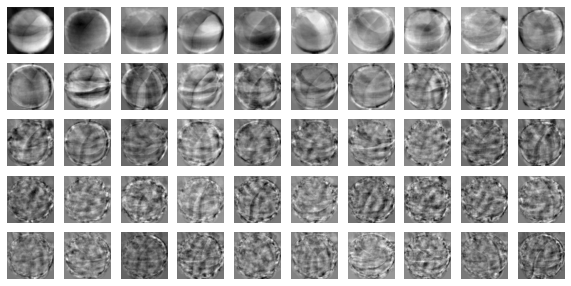

In [7]:
d_f(pca.components_.reshape(-1,100,100))

In [8]:
f_2D.shape

(300, 10000)

In [10]:
f_2D_pca=pca.transform(f_2D)
f_2D_pca.shape

(300, 50)

In [11]:
new_data=pca.inverse_transform(f_2D_pca)
new_data.shape

(300, 10000)

In [12]:
new_data=pca.inverse_transform(f_2D_pca)
tr_new_data=new_data.reshape(-1,100,100)

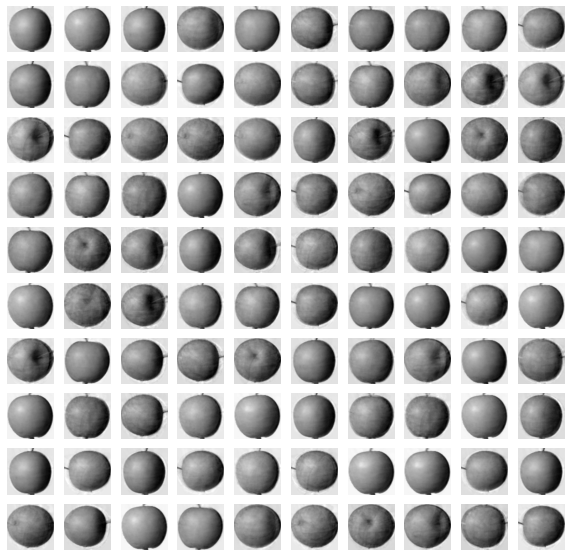

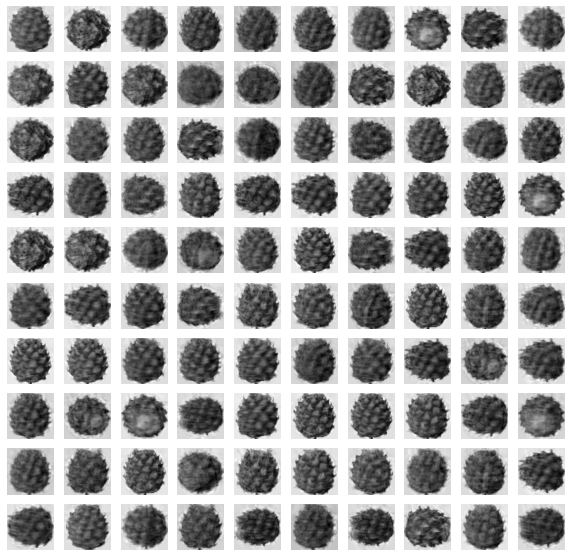

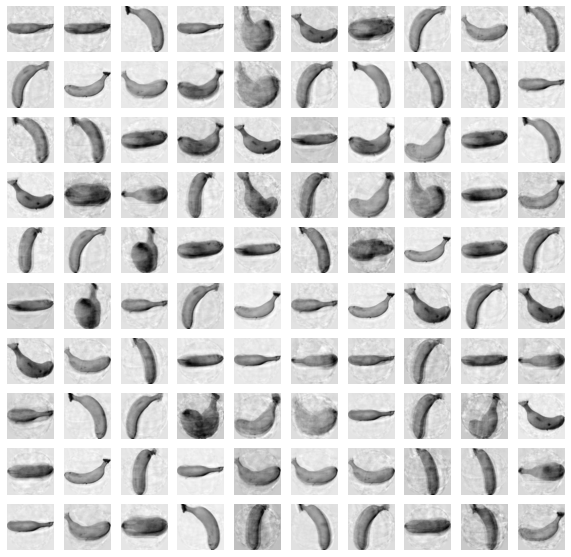

In [13]:
for i in [0,100,200]:
  d_f(tr_new_data[i:i+100])
  print('\n')

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
X=f_2D
Y=np.array([0]*100+[1]*100+[2]*100)

In [17]:
from sklearn.model_selection import cross_validate
sc=cross_validate(lr,X,Y)
print(np.mean(sc['test_score']),np.mean(sc['fit_time']))

0.9966666666666667 1.3238467216491698


In [18]:
f_2D_pca.shape

(300, 50)

In [19]:
sc=cross_validate(lr,f_2D_pca,Y)
print(np.mean(sc['test_score']),np.mean(sc['fit_time']))

1.0 0.02890915870666504


In [20]:
pca=PCA(n_components=0.5)
pca.fit(f_2D)

PCA(n_components=0.5)

In [21]:
pca.n_components_

2

In [23]:
f_pca=pca.transform(f_2D)
f_pca.shape

(300, 2)

In [24]:
sc=cross_validate(lr,f_pca,Y)
print(np.mean(sc['test_score']),np.mean(sc['fit_time']))

0.99 0.04074902534484863


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [26]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=42)
km.fit(f_pca)

KMeans(n_clusters=3, random_state=42)

In [27]:
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

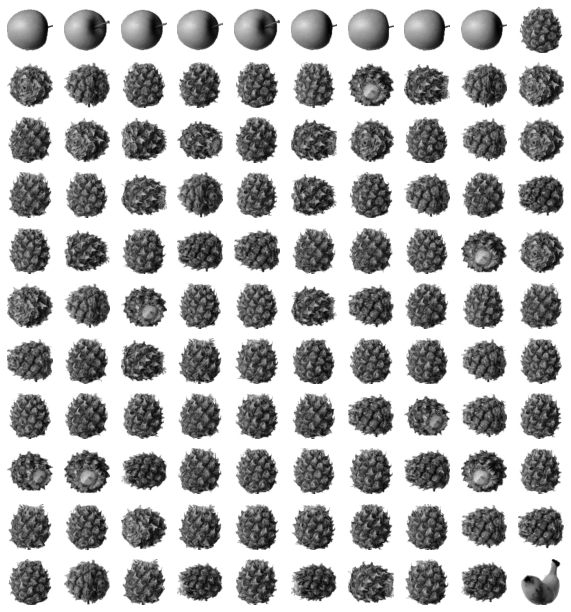

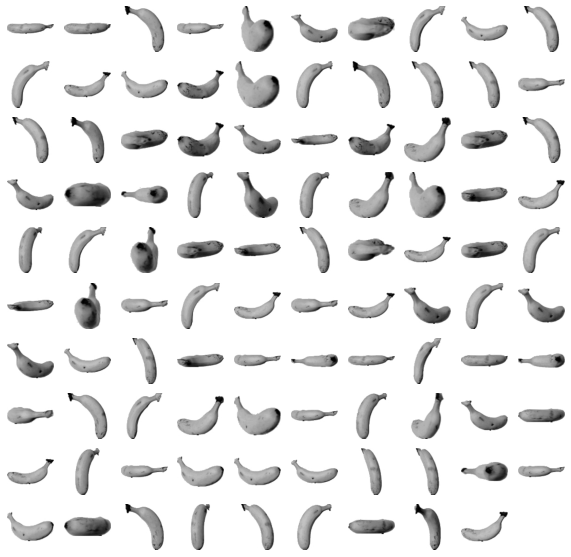

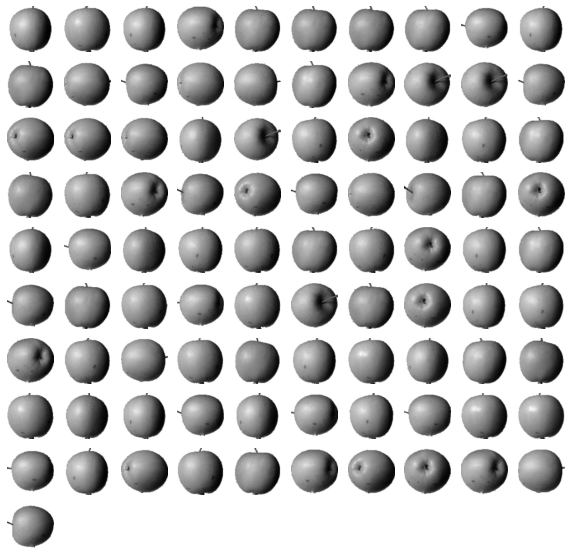

In [28]:
for i in range(3):
  d_f(f[km.labels_==i])
  print('\n')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50528 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_

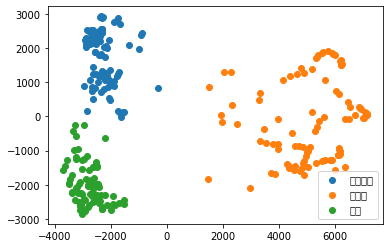

In [29]:
for i in range(3):
  data=f_pca[km.labels_==i]
  plt.scatter(data[:,0],data[:,1])
plt.legend(['파인애플','바나나','사과'])
plt.show()

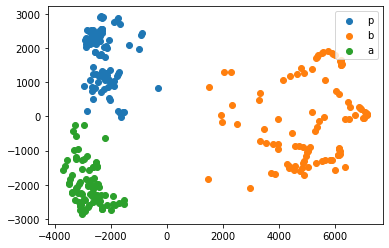

In [30]:
for i in range(3):
  data=f_pca[km.labels_==i]
  plt.scatter(data[:,0],data[:,1])
plt.legend(['p','b','a'])
plt.show()